In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
#Считаем данные по росту и весу
data = pd.read_csv('weights_heights.csv', index_col='Index')

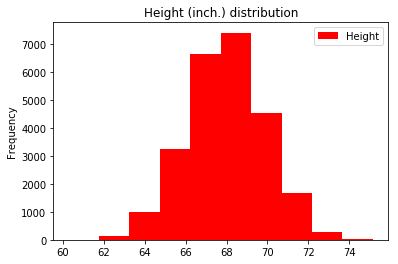

In [92]:
# Построим гистограмму распределения роста подростков из выборки data
data.plot(y="Height", kind='hist', color='red', title='Height (inch.) distribution')

In [93]:
# [2] Посмотрим на первые 5 записей с помощью метода head Pandas DataFrame
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


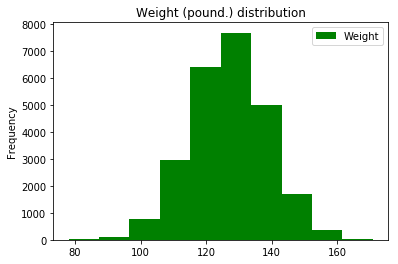

In [94]:
# Нарисуем гистограмму распределения веса 
data.plot(y="Weight", kind='hist', color='green', title='Weight (pound.) distribution')

In [95]:
# Создадим признак Индекс массы тела
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [96]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

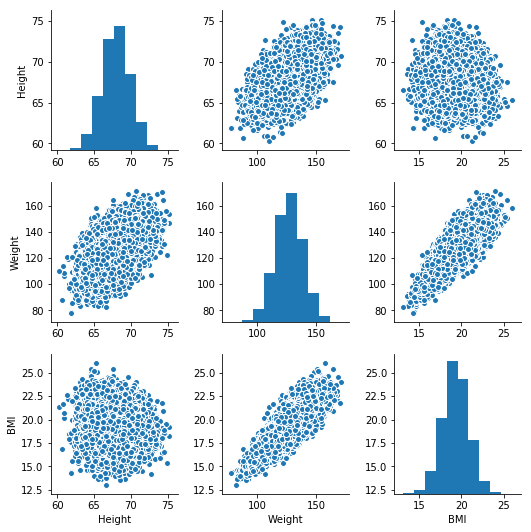

In [97]:
# [3]. Построим картинку, 
# на которой будут отображены попарные зависимости признаков , 'Height', 'Weight' и 'BMI' друг от друга
data_sns = sns.pairplot(data)

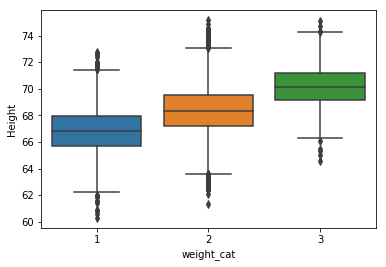

In [98]:
#[4]. Создадим в DataFrame data новый признак weight_category, 
# который будет иметь 3 значения: 1 – если вес меньше 120 фунтов. (~ 54 кг.), 
# 3 - если вес больше или равен 150 фунтов (~68 кг.), 2 – в остальных случаях. 
# Построим «ящик с усами» (boxplot), демонстрирующий зависимость роста от весовой категории.

def weight_category(weight):
    if weight < 120:
        return 1
    elif weight >= 150:
        return 3
    else:
        return 2

data['weight_cat'] = data['Weight'].apply(weight_category)
ax = sns.boxplot(x="weight_cat", y="Height", data=data)

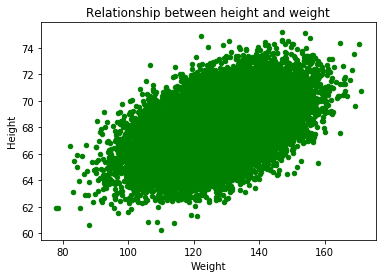

In [99]:
# [5]. Построим scatter plot зависимости роста от веса
data.plot(y="Height", x="Weight", kind='scatter', color='green', title='Relationship between height and weight')

In [100]:
# [6]. Напишите функцию, которая по двум параметрам  w0w0  и  w1w1  вычисляет квадратичную ошибку 
# приближения зависимости роста  y  от веса  x

def error(w0, w1, x, y):
    return np.sum((y-(w0 + w1 * x))**2)/len(y)

# Так же функцию, которая строит прямую по двум параметрам w0, w1
def error_line(w0, w1, x0, x1):
    y_res = []
    x_res = []
    y_res.append(w0 + w1 * x0)
    x_res.append(x0)
    y_res.append(w0 + w1 * x1)
    x_res.append(x1)
    return x_res, y_res

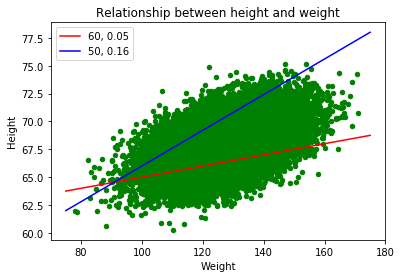

In [101]:
# [7]. Проведём на графике из п. 5 Задания 1 две прямые, соответствующие значениям параметров 
# ( w0,w1)=(60,0.05)w0,w1)=(60,0.05)  и ( w0,w1)=(50,0.16)
x1, y1 = error_line(60, 0.05, 75, 175)
x2, y2 = error_line(50, 0.16, 75, 175)

data.plot(y="Height", x="Weight", kind='scatter', color='green', title='Relationship between height and weight')
plt.plot(x1, y1, color="red")
plt.plot(x2, y2, color="blue")
plt.legend(["60, 0.05","50, 0.16"])

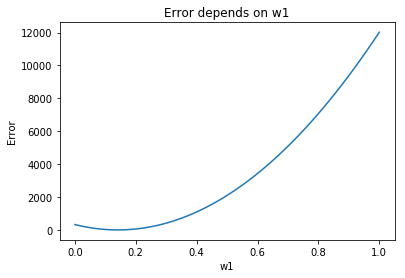

In [102]:
# [8]. Построим график зависимости функции ошибки, посчитанной в п. 6, от параметра  w1  при  w0  = 50.

x = np.linspace(0, 1)
y = np.vectorize(lambda t: error(50, t, data["Weight"],  data["Height"]))
plt.plot(x, y(x))
plt.xlabel('w1')
plt.ylabel('Error')
plt.title('Error depends on w1')
plt.show()

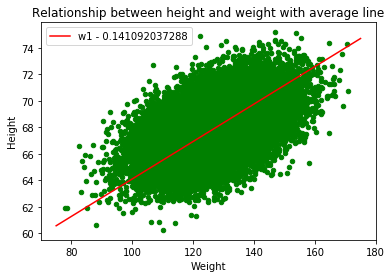

In [103]:
# [9]. С помощью метода minimize_scalar из scipy.optimize найдём минимум функции, 
# определенной в п. 6, для значений параметра  w1  в диапазоне [-5,5]. Проведём на графике из п. 5 Задания 1 
# прямую, соответствующую значениям параметров (w0, w1) = (50, w1_opt), где  
# w1_opt  – найденное в п. 8 оптимальное значение параметра  w1.

from scipy.optimize import minimize_scalar

def func(w1):
    return error(50, w1, data["Weight"],  data["Height"])

res = minimize_scalar(func, bounds=(-5, 5), method='bounded')

data.plot(y="Height", x="Weight", kind='scatter', color='green', title='Relationship between height and weight with average line')
x1, y1 = error_line(50, res.x, 75, 175)
plt.plot(x1, y1, color="red")
plt.legend(["w1 - {}".format(str(res.x))])

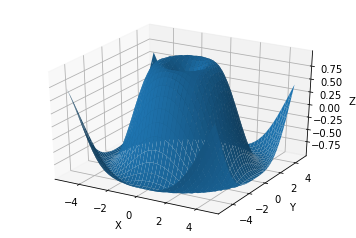

In [104]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

# Создаем массивы NumPy с координатами точек по осям X и У. 
# Используем метод meshgrid, при котором по векторам координат 
# создается матрица координат. Задаем нужную функцию Z(x, y).
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Наконец, используем метод *plot_surface* объекта 
# типа Axes3DSubplot. Также подписываем оси.
surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

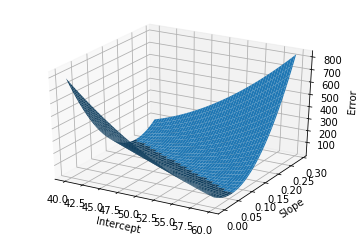

In [105]:
# [10]. Постройте 3D-график зависимости функции ошибки, посчитанной в п.6 от параметров w0 и  w1. 
# Подпишите ось  x  меткой «Intercept», ось  y  – меткой «Slope», a ось  z  – меткой «Error».

fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

X = np.arange(40, 60, 0.2)
Y = np.arange(0, 0.3, 0.01)
X, Y = np.meshgrid(X, Y)

a = X.shape[0]
b = Y.shape[1]
Z = np.zeros((a, b))

for i in range(a):
    for j in range(b):
        Z[i,j] = error(X[i, j], Y[i,j], data["Weight"],  data["Height"])

surf = ax.plot_surface(X, Y, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

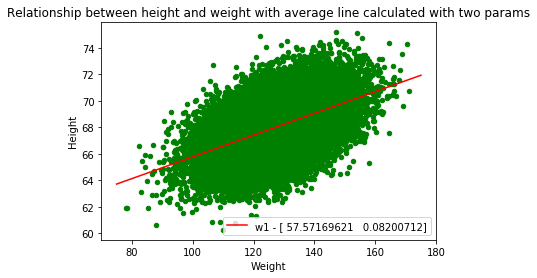

In [106]:
# [11]. С помощью метода minimize из scipy.optimize найдём минимум функции, определенной в п. 6, 
# для значений параметра  w0w0  в диапазоне [-100,100] и  w1w1  - в диапазоне [-5, 5]. 
# Начальная точка – ( w0w0 ,  w1w1 ) = (0, 0). Используя метод оптимизации L-BFGS-B 
# (аргумент method метода minimize). Проведём на графике из п. 5 Задания 1 прямую, 
# соответствующую найденным оптимальным значениям параметров w0 и w1. 

from scipy.optimize import minimize

def func(p):
    w0, w1 = p
    return error(w0, w1, data["Weight"],  data["Height"])

res = minimize(func, (0, 0), method='L-BFGS-B', bounds=((-100, 100), (-5, 5)))


data.plot(y="Height", x="Weight", kind='scatter', color='green', 
          title='Relationship between height and weight with average line calculated with two params')
x1, y1 = error_line(res.x[0], res.x[1], 75, 175)
plt.plot(x1, y1, color="red")
plt.legend(["w1 - {}".format(str(res.x))])